In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import silhouette_score, silhouette_samples
from tqdm import tqdm


In [16]:
def impute_within_cluster(cluster_df, column_name):
    imputer = SimpleImputer(strategy='mean')  
    cluster_df[column_name] = imputer.fit_transform(cluster_df[[column_name]])
    return cluster_df

In [17]:
data = pd.read_csv("data/Customer Data.csv")
display(data.loc[data.isna().any(axis=1)])
display(data.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
X = data.drop(columns=['CUST_ID', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS'])
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
data['Cluster'] = kmeans.fit_predict(X)

data = data.groupby('Cluster', group_keys=False).apply(impute_within_cluster, 'CREDIT_LIMIT')
data.drop(columns=['Cluster'], inplace=True)

X = data.drop(columns=['CUST_ID', 'MINIMUM_PAYMENTS'])
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
data['Cluster'] = kmeans.fit_predict(X)

data = data.groupby('Cluster', group_keys=False).apply(impute_within_cluster, 'MINIMUM_PAYMENTS')
data.drop(columns=['Cluster'], inplace=True)

In [19]:
data.shape

(8950, 18)

In [20]:
data.loc[data.isna().any(axis=1)]  # ensure no NA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


C:\Users\vince\AppData\Local\Temp\ipykernel_59840\3692320006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, figsize=(15, 15))


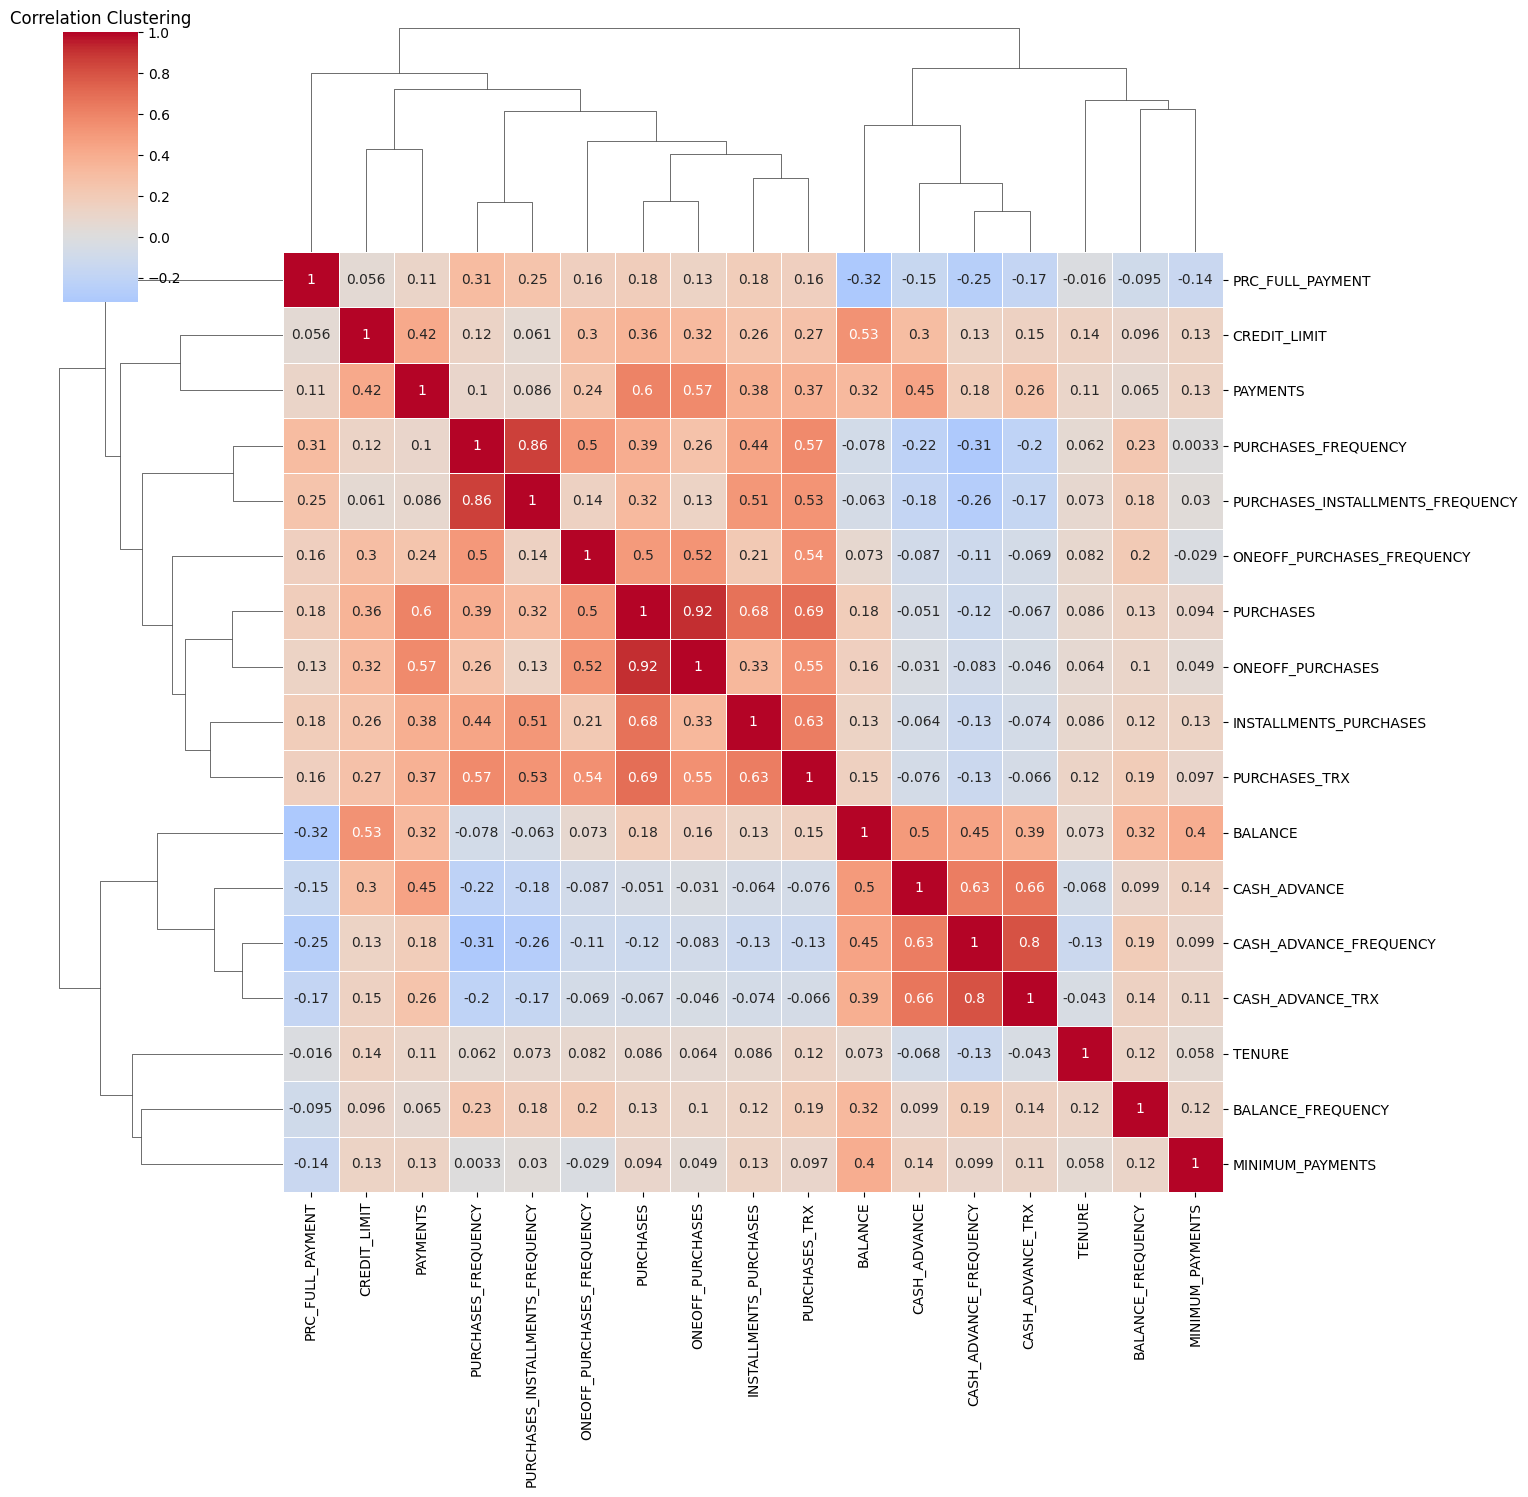

In [21]:
sns.clustermap(data.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, figsize=(15, 15))
plt.title('Correlation Clustering')
plt.show()

In [22]:
data['CREDIT_UTILIZATION'] = data['BALANCE'] / data['CREDIT_LIMIT']
data['DEBT_TO_PAYMENT_RATIO'] = np.where(data['PAYMENTS'] == 0, 0, data['BALANCE'] / data['PAYMENTS'])
data['PURCHASE_TO_LIMIT'] = data['PURCHASES'] / data['CREDIT_LIMIT']
data['PAYMENT_CONSISTENCY'] = data['PAYMENTS'] / (data['BALANCE'] + 1)  # avoid division by zero
data['CASH_ADVANCE_TO_PURCHASES'] = data['CASH_ADVANCE'] / (data['PURCHASES'] + 1) # same
data['ENGAGEMENT_INDEX'] = (
    data['PURCHASES_FREQUENCY'] +
    data['ONEOFF_PURCHASES_FREQUENCY'] +
    data['PURCHASES_INSTALLMENTS_FREQUENCY'] +
    data['CASH_ADVANCE_FREQUENCY']
)
data['RISK_SCORE'] = (
    (data['CREDIT_UTILIZATION'] > 0.8).astype(int) +
    (data['CASH_ADVANCE_TO_PURCHASES'] > 0.5).astype(int) +
    (data['PAYMENT_CONSISTENCY'] < 0.3).astype(int) +
    (data['DEBT_TO_PAYMENT_RATIO'] > 1.5).astype(int)
)
data['RISKY_CUSTOMER'] = (data['RISK_SCORE'] >= data['RISK_SCORE'].max() * 0.95)  # risky if score >= threshold = 5% of the maximum score

data['OUTSTANDING_SCORE'] = (
    (data['CREDIT_UTILIZATION'] < 0.3).astype(int) +
    (data['PAYMENT_CONSISTENCY'] > 0.8).astype(int) +
    (data['CASH_ADVANCE_TO_PURCHASES'] < 0.2).astype(int)
)
data['OUTSTANDING_CUSTOMER'] = (data['OUTSTANDING_SCORE'] >= data['OUTSTANDING_SCORE'].max() * 0.95)  # outstanding if score >= threshold = 5% of the maximum score


100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


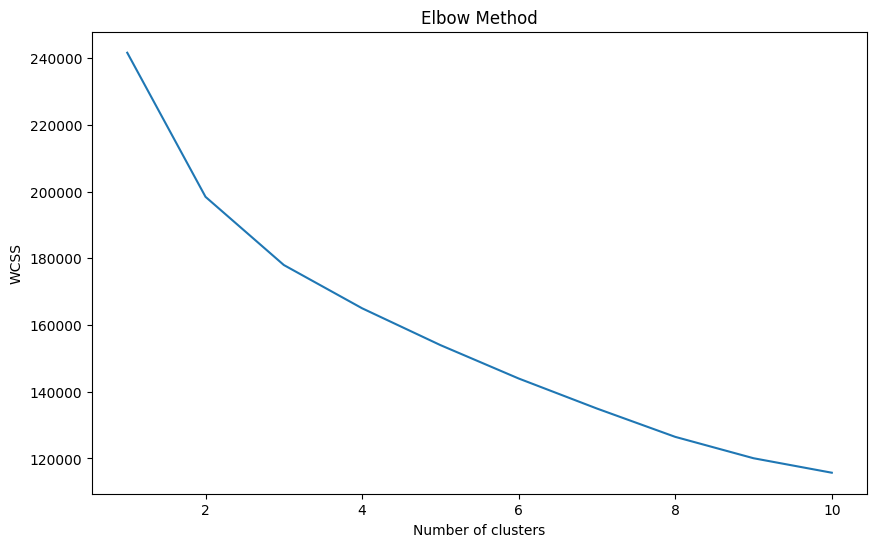

Silhouette Score: 0.19056650819312598


C:\Users\vince\AppData\Local\Temp\ipykernel_59840\3405927657.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = data.groupby('Cluster').mean()


In [23]:
features = data.drop(columns=['CUST_ID']).columns
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_cluster_max = 10
wcss = []
for i in tqdm(range(1, n_cluster_max + 1)):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_cluster_max + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
data['Cluster'] = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()

  0%|          | 0/7 [00:00<?, ?it/s]

For n_clusters = 2 The average silhouette_score is : 0.21217743033031153


 14%|█▍        | 1/7 [00:02<00:17,  2.97s/it]

For n_clusters = 3 The average silhouette_score is : 0.19807708186118056


 29%|██▊       | 2/7 [00:05<00:13,  2.70s/it]

For n_clusters = 4 The average silhouette_score is : 0.19057804978483253


 43%|████▎     | 3/7 [00:07<00:10,  2.60s/it]

For n_clusters = 5 The average silhouette_score is : 0.1883235536565651


 57%|█████▋    | 4/7 [00:10<00:07,  2.54s/it]

For n_clusters = 6 The average silhouette_score is : 0.20804832774460383


 71%|███████▏  | 5/7 [00:12<00:04,  2.49s/it]

For n_clusters = 7 The average silhouette_score is : 0.19744723643835504


 86%|████████▌ | 6/7 [00:15<00:02,  2.44s/it]

For n_clusters = 8 The average silhouette_score is : 0.19650860501800513


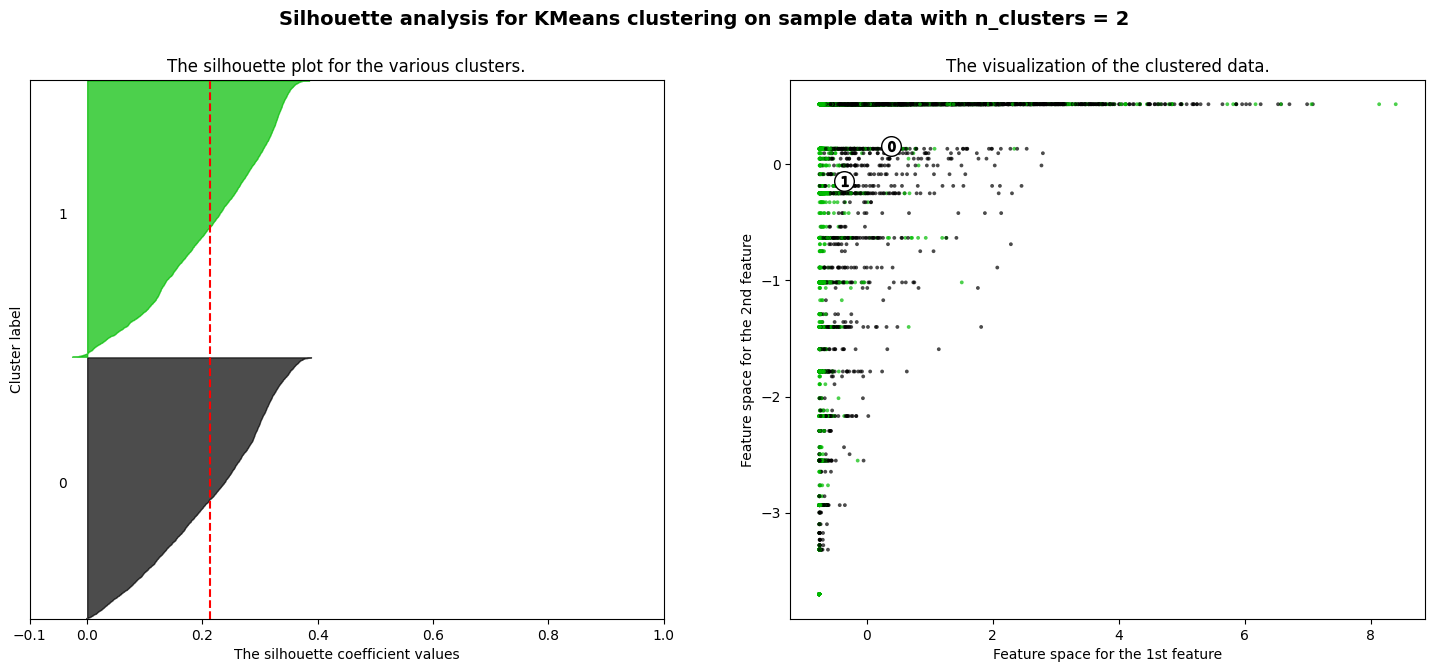

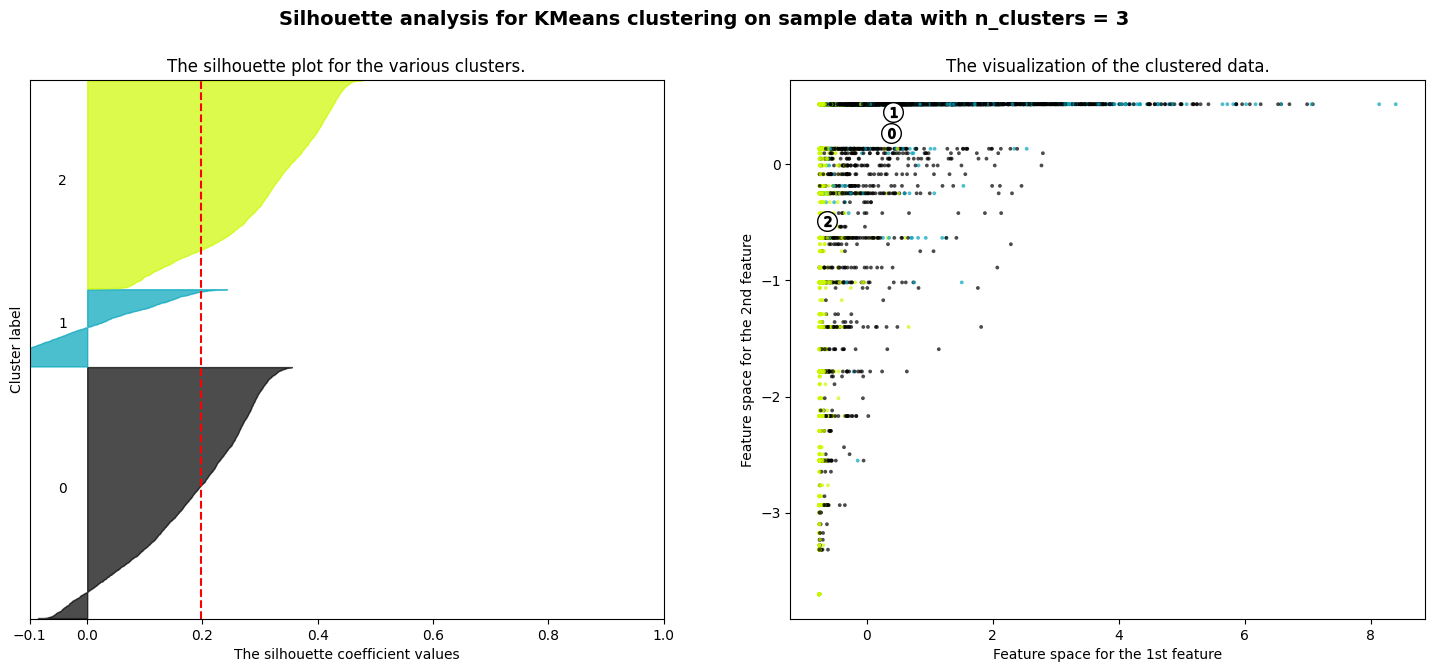

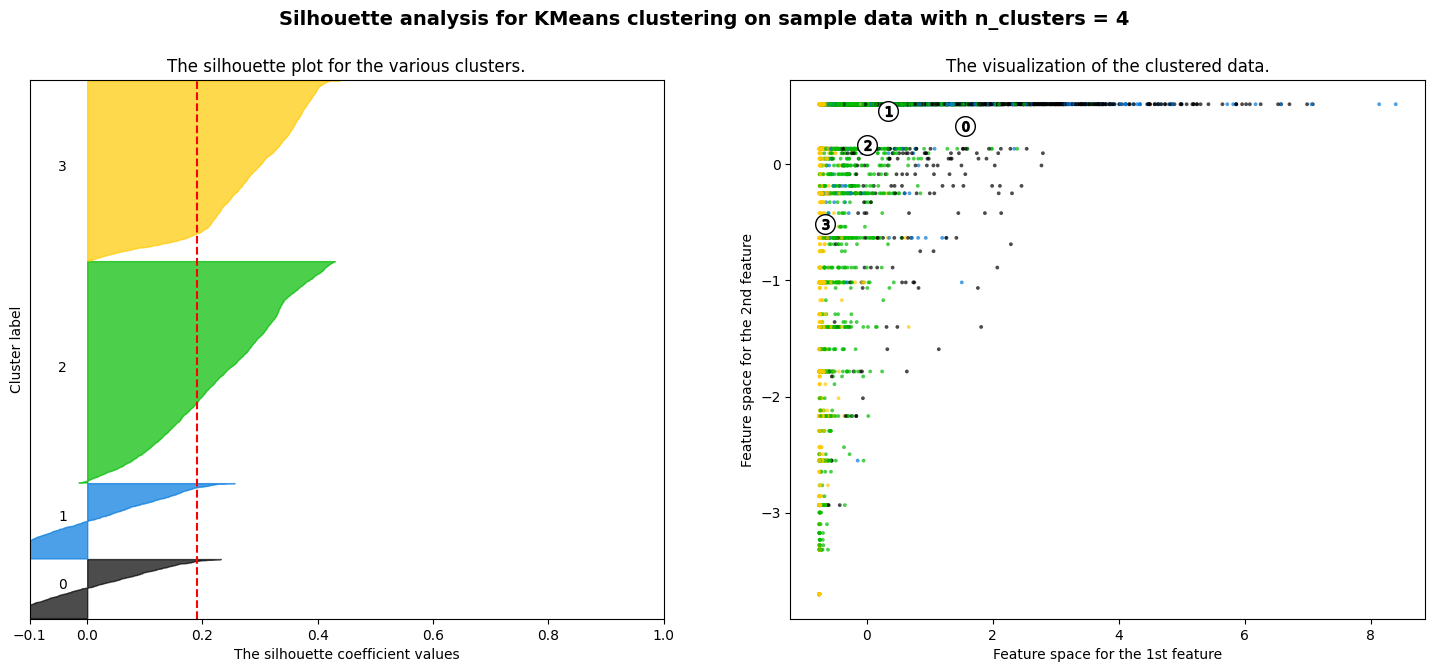

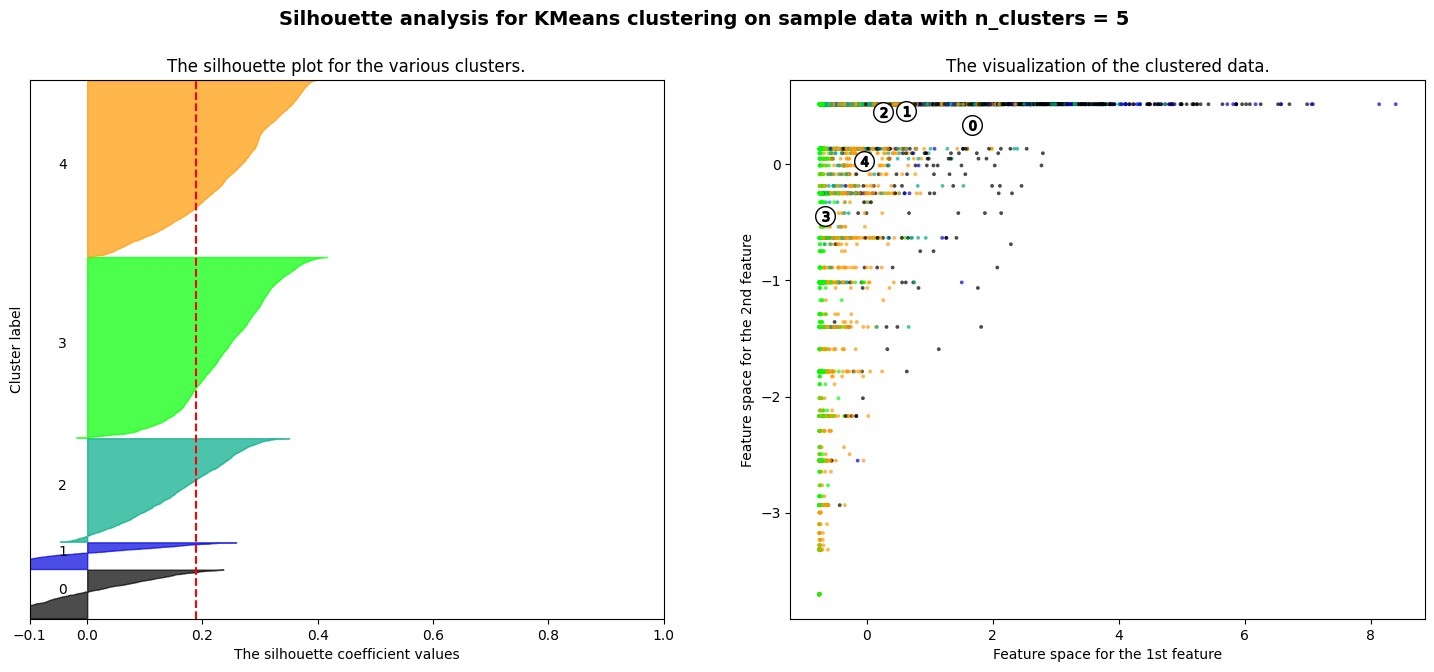

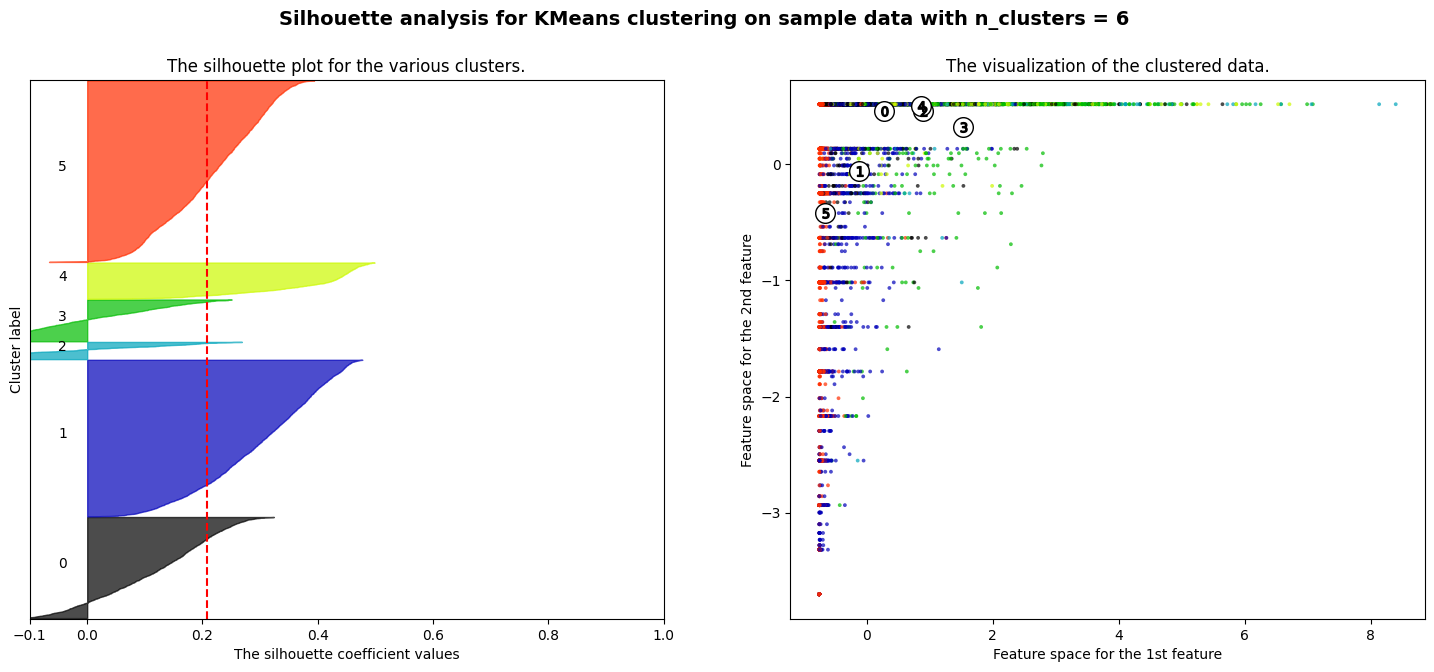

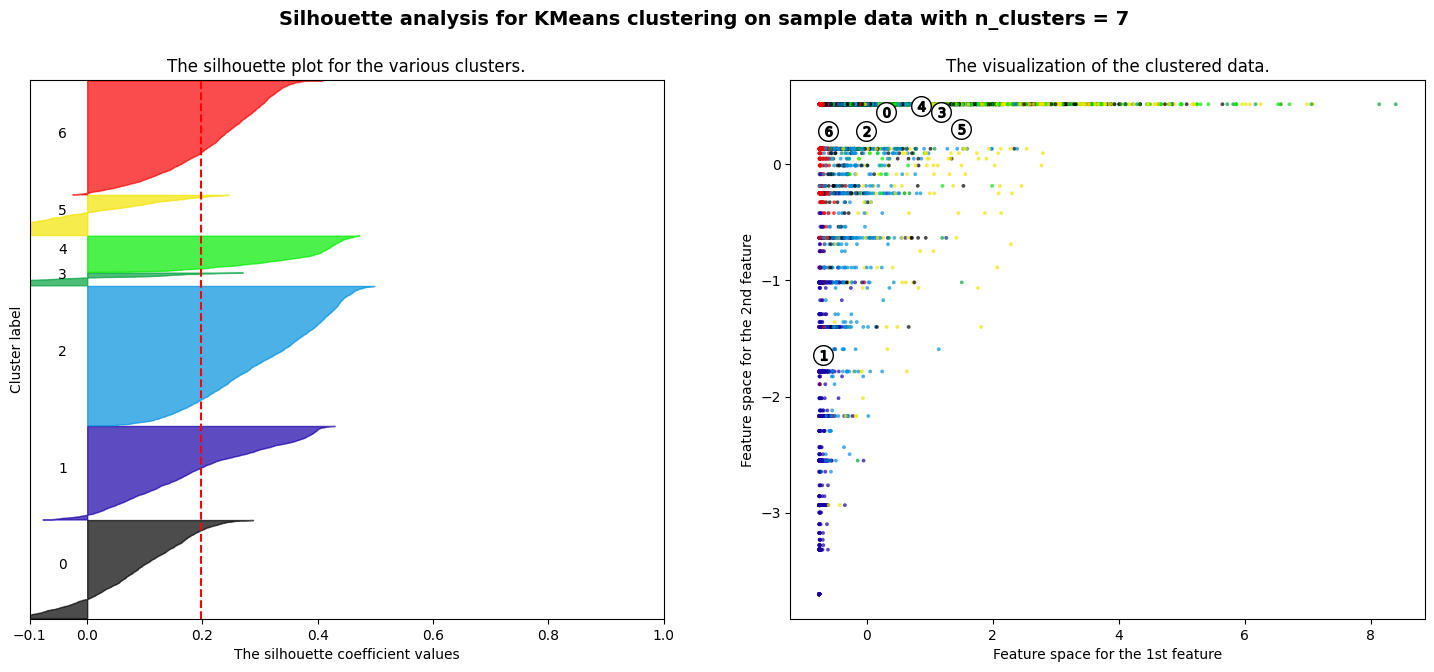

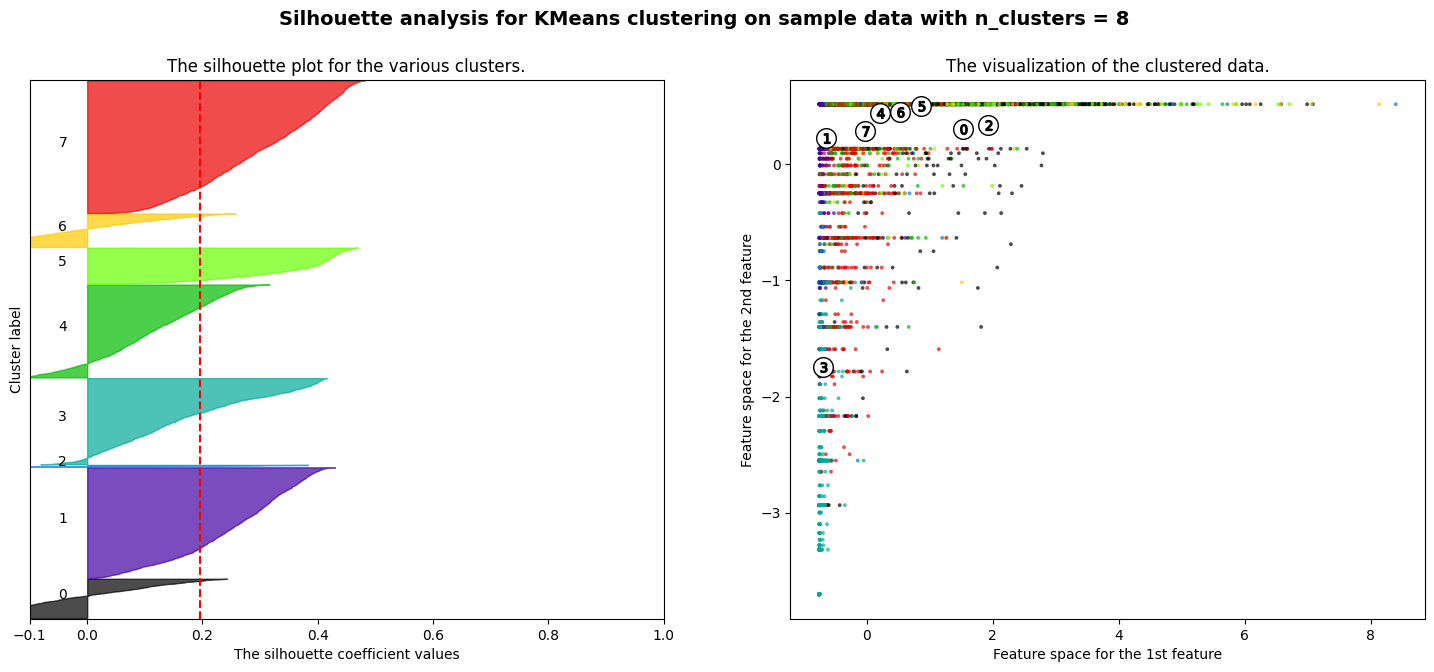

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
y = data['Cluster']

range_n_clusters = range(2, 9)
for n_clusters in tqdm(range_n_clusters, leave=False):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10, max_iter=300)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [25]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CREDIT_UTILIZATION',
       'DEBT_TO_PAYMENT_RATIO', 'PURCHASE_TO_LIMIT', 'PAYMENT_CONSISTENCY',
       'CASH_ADVANCE_TO_PURCHASES', 'ENGAGEMENT_INDEX', 'RISK_SCORE',
       'RISKY_CUSTOMER', 'OUTSTANDING_SCORE', 'OUTSTANDING_CUSTOMER',
       'Cluster'],
      dtype='object')

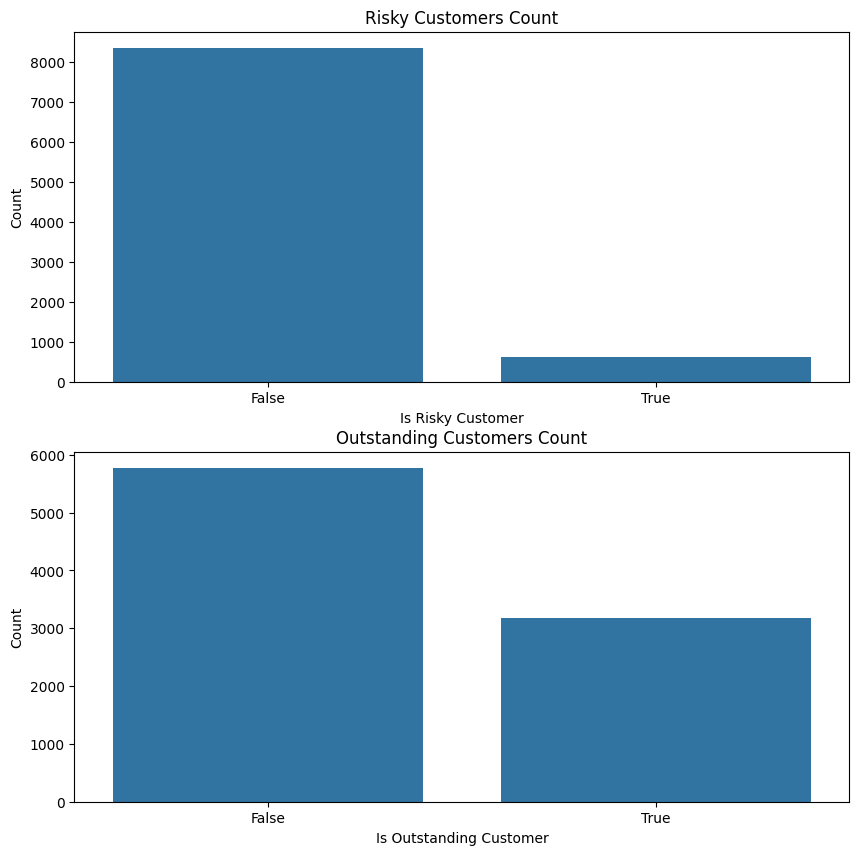

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x='RISKY_CUSTOMER', data=data)
plt.title('Risky Customers Count')
plt.xlabel('Is Risky Customer')
plt.ylabel('Count')

plt.subplot(2,1,2)
sns.countplot(x='OUTSTANDING_CUSTOMER', data=data)
plt.title('Outstanding Customers Count')
plt.xlabel('Is Outstanding Customer')
plt.ylabel('Count')
plt.show()


C:\Users\vince\AppData\Local\Temp\ipykernel_59840\2075123911.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


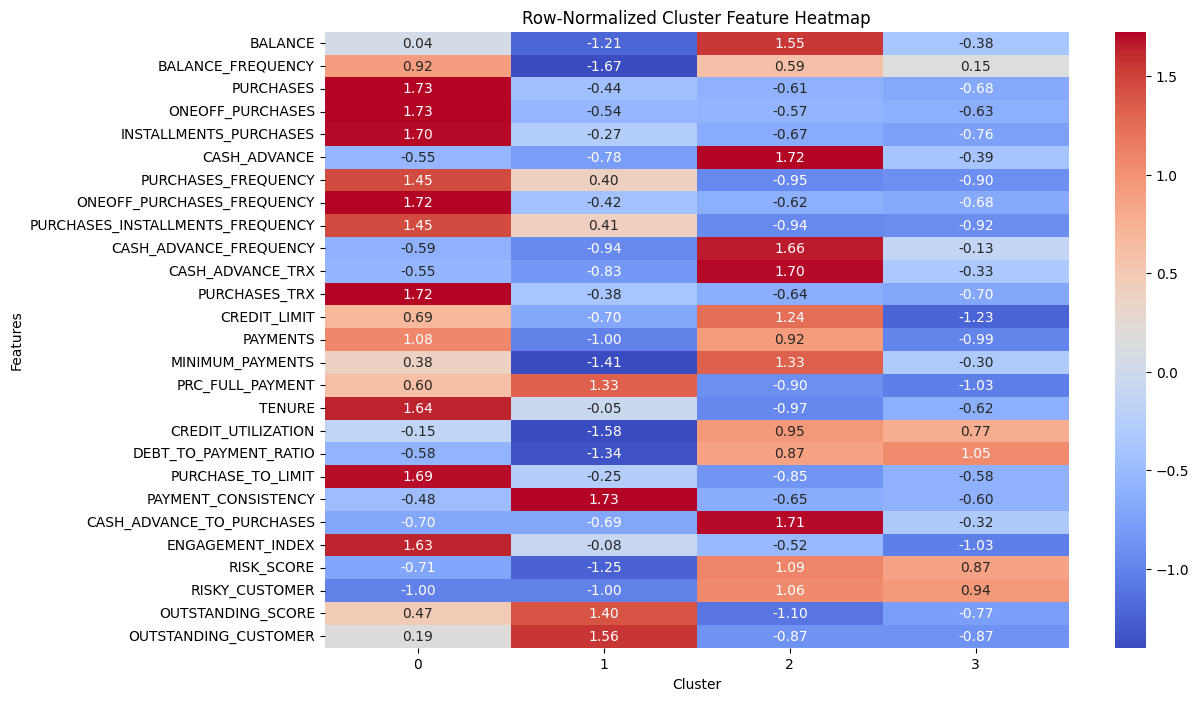

In [48]:
cluster_means = data.groupby('Cluster').mean()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_means_normalized = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    index=cluster_means.index,
    columns=cluster_means.columns
)

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_normalized.T, annot=True, cmap='coolwarm', fmt='.2f', robust=True)
plt.title('Row-Normalized Cluster Feature Heatmap')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.show()


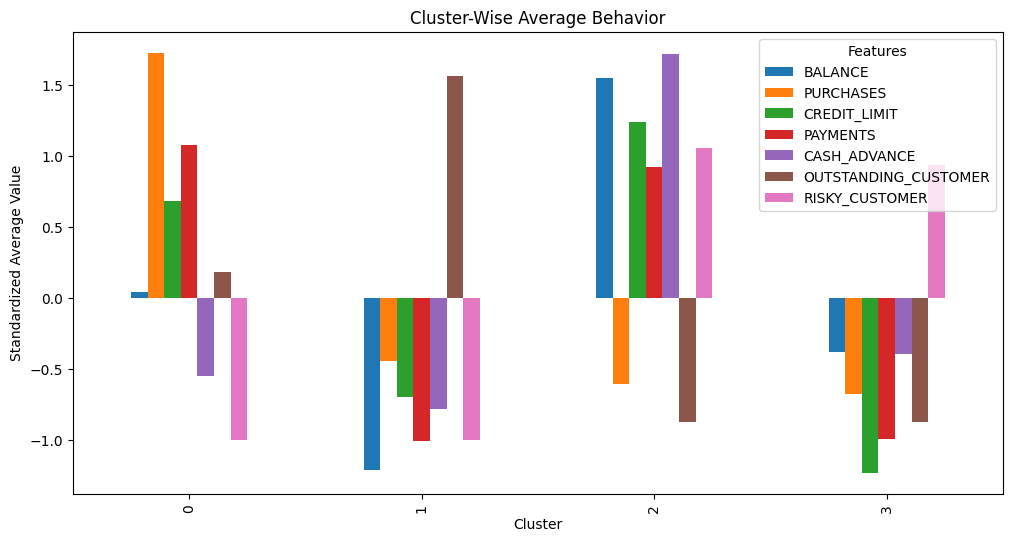

In [50]:
# cluster_summary = data.groupby('Cluster').mean()

features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'CASH_ADVANCE', 'OUTSTANDING_CUSTOMER', 'RISKY_CUSTOMER']
cluster_means_normalized[features].plot(kind='bar', figsize=(12, 6))
plt.title('Cluster-Wise Average Behavior')
plt.xlabel('Cluster')
plt.ylabel('Standardized Average Value')
plt.legend(title='Features')
plt.show()


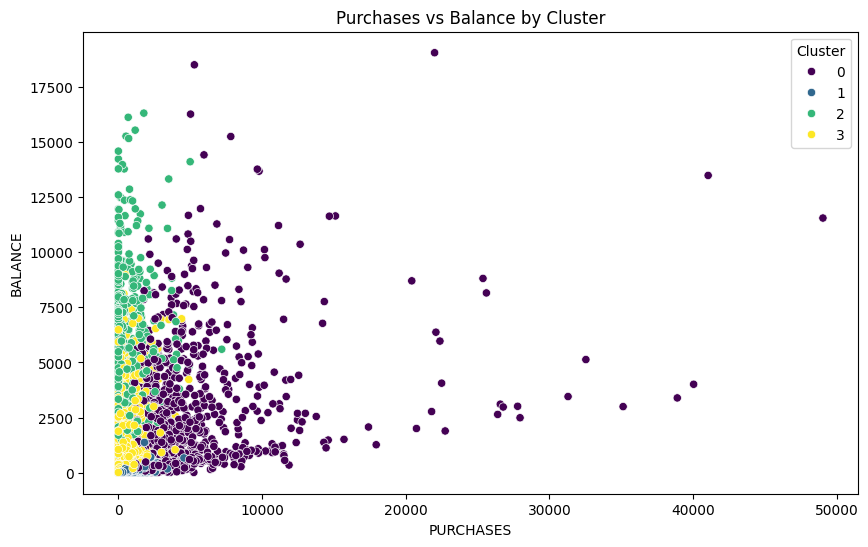

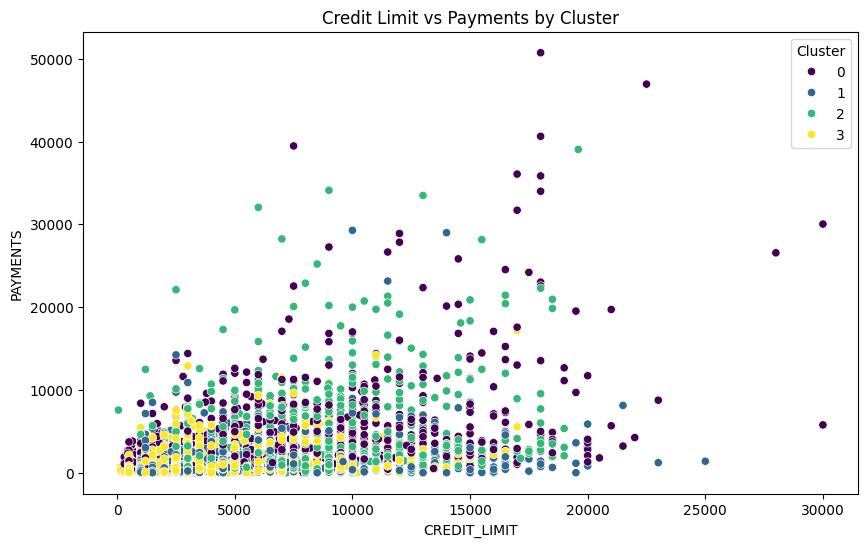

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='Cluster', data=data, palette='viridis')
plt.title('Purchases vs Balance by Cluster')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='PAYMENTS', hue='Cluster', data=data, palette='viridis')
plt.title('Credit Limit vs Payments by Cluster')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PAYMENTS')
plt.legend(title='Cluster')
plt.show()


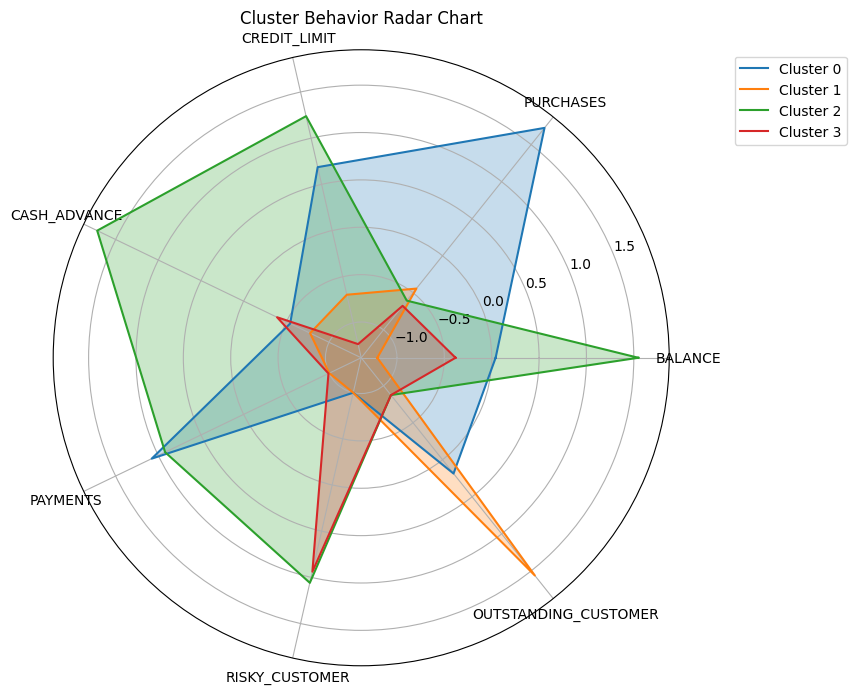

In [55]:
from math import pi

features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS', 'RISKY_CUSTOMER', 'OUTSTANDING_CUSTOMER']
num_clusters = len(data['Cluster'].unique())
angles = np.linspace(0, 2 * pi, len(features), endpoint=False).tolist()

angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for cluster in range(num_clusters):
    values = cluster_means_normalized.loc[cluster, features].values.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), features)
plt.title('Cluster Behavior Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()